# Data Modeling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
tnd_climate = pd.read_csv('data/clean/all_counties_tnd_climate_combined.csv')
tnd_climate = tnd_climate[tnd_climate['County'] != 'Menominee County']
hot_tnd_climate = pd.read_csv('data/clean/hot_counties_tnd_wint.csv')
hot_tnd_climate = hot_tnd_climate[hot_tnd_climate['County'] != 'Menominee County']
hotter_tnd_climate = pd.read_csv('data/clean/hotter_counties_tnd_wint.csv')
hotter_tnd_climate = hotter_tnd_climate[hotter_tnd_climate['County'] != 'Menominee County']

In [3]:
tnd_climate.loc[:, 'County'] = tnd_climate['County'].astype('category')
hot_tnd_climate.loc[:, 'County'] = hot_tnd_climate['County'].astype('category')
hotter_tnd_climate.loc[:, 'County'] = hotter_tnd_climate['County'].astype('category')

In [4]:
train, test = train_test_split(tnd_climate, test_size = 0.2, random_state=10)
hot_county_train, hot_county_test = train_test_split(hot_tnd_climate, test_size = 0.2, random_state=10)
hotter_county_train, hotter_county_test = train_test_split(hotter_tnd_climate, test_size = 0.2, random_state=10)

In [5]:
def linear_regression_model(X_train, y_train):
    print("Linear Regression Models")
    linear_regression_model_separate(X_train, y_train)
    linear_regression_model_combined(X_train, y_train)

In [6]:
def linear_regression_model_separate(X_train, y_train):
    model = LinearRegression()
    for i in range(X_train.shape[1]):
        x_train = pd.DataFrame(X_train.iloc[:, i])
        val_error = -1 * cross_val_score(model, x_train, y_train, scoring='neg_mean_squared_error', cv=5).mean()
        print(f"Model: {X_train.columns[i]}")
        print(f"val_error = {val_error:6.3f}")

In [7]:
def linear_regression_model_combined(X_train, y_train):
    model = LinearRegression()
    val_error = -1 * cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5).mean()
    print(f"Model: Combined")
    print(f"val_error = {val_error:6.3f}")

In [8]:
def polynomial_regression_model(X_train, y_train, degree_range):
    print("Polynomial Regression Models")
    polynomial_regression_model_separate(X_train, y_train, degree_range)
    polynomial_regression_model_combined(X_train, y_train, degree_range)

In [9]:
def polynomial_regression_model_separate(X_train, y_train, degree_range):
    for i in range(X_train.shape[1]):
        for j in range(degree_range):
            model = Pipeline(steps=[
                ('poly', PolynomialFeatures(degree=j + 1, include_bias=False)),
                ('lm', LinearRegression())
            ])
            x_train = pd.DataFrame(X_train.iloc[:, i])
            val_error = -1 * cross_val_score(model, x_train, y_train, scoring='neg_mean_squared_error', cv=5).mean()
            print(f"Model {X_train.columns[i]}: degree {j+1}")
            print(f"val_error = {val_error:6.3f}")

In [10]:
def polynomial_regression_model_combined(X_train, y_train, degree_range):
    for j in range(degree_range):
        model = Pipeline(steps=[
            ('poly', PolynomialFeatures(degree=j + 1, include_bias=False)),
            ('scaler', StandardScaler()),
            ('lm', LinearRegression())
        ])

        val_error = -1 * cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5).mean()
        print(f"Model Combined: degree {j+1}")
        print(f"val_error = {val_error:6.3f}")

In [11]:
def logistic_regression_model(X_train, y_train):
    print("Logistic Regression Models")
    logistic_regression_model_separate(X_train, y_train)
    logistic_regression_model_combined(X_train, y_train)

In [12]:
def logistic_regression_model_separate(X_train, y_train):
    model = LogisticRegression(class_weight='balanced')
    for i in range(X_train.shape[1]):
        x_train = pd.DataFrame(X_train.iloc[:, i])
        accuracy = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=5).mean()
        precision = cross_val_score(model, x_train, y_train, scoring='precision', cv=5).mean()
        recall = cross_val_score(model, x_train, y_train, scoring='recall', cv=5).mean()  
        f_score = 2 * (precision * recall) / (precision + recall)
        print(f"Logistic Model: {X_train.columns[i]}")
        print(f"accuracy = {accuracy:6.3f}")
        print(f"precision = {precision:6.3f}")
        print(f"recall = {recall:6.3f}") 
        print(f"f_score = {f_score:6.3f}")

In [13]:
def logistic_regression_model_combined(X_train, y_train):
    model = LogisticRegression(class_weight='balanced')
    accuracy = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5).mean()
    precision = cross_val_score(model, X_train, y_train, scoring='precision', cv=5).mean()
    recall = cross_val_score(model, X_train, y_train, scoring='recall', cv=5).mean()    
    f_score = 2 * (precision * recall) / (precision + recall)
    print(f"Logistic Model: Combined")
    print(f"accuracy = {accuracy:6.3f}")
    print(f"precision = {precision:6.3f}")
    print(f"recall = {recall:6.3f}")
    print(f"f_score = {f_score:6.3f}")

In [14]:
def logistic_regression_onehot(X_train, y_train, categorical_names, quant_names):
    print(f"Logistic Regression Models One Hot Encoding {categorical_names}")
    logistic_regression_onehot_separate(X_train, y_train, categorical_names, quant_names)
    logistic_regression_onehot_combined(X_train, y_train, categorical_names, quant_names)

In [15]:
def logistic_regression_onehot_separate(X_train, y_train, categorical_names, quant_names):
    for i in range(len(quant_names)):
        column_trans = ColumnTransformer(transformers=[
            ('scaler', StandardScaler(), [quant_names[i]]),
            ('onehot', OneHotEncoder(), categorical_names)
        ])

        model = Pipeline(steps=[
            ('preprocessor', column_trans),
            ('lm', LogisticRegression(class_weight='balanced', max_iter=200))
        ])

        accuracy = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5).mean()
        precision = cross_val_score(model, X_train, y_train, scoring='precision', cv=5).mean()
        recall = cross_val_score(model, X_train, y_train, scoring='recall', cv=5).mean() 
        f_score = 2 * (precision * recall) / (precision + recall)
        print(f"One Hot Logistic Model: {quant_names[i]}")
        print(f"accuracy = {accuracy:6.3f}")
        print(f"precision = {precision:6.3f}")
        print(f"recall = {recall:6.3f}")
        print(f"f_score = {f_score:6.3f}")

In [16]:
def logistic_regression_onehot_combined(X_train, y_train, categorical_names, quant_names):
    column_trans = ColumnTransformer(transformers=[
        ('scaler', StandardScaler(), quant_names),
        ('onehot', OneHotEncoder(), categorical_names)
    ])

    model = Pipeline(steps=[
        ('preprocessor', column_trans),
        ('lm', LogisticRegression(class_weight='balanced', max_iter=200))
    ])

    accuracy = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5).mean()
    precision = cross_val_score(model, X_train, y_train, scoring='precision', cv=5).mean()
    recall = cross_val_score(model, X_train, y_train, scoring='recall', cv=5).mean()    
    f_score = 2 * (precision * recall) / (precision + recall)
    print(f"One Hot Logistic Model: Combined")
    print(f"accuracy = {accuracy:6.3f}")
    print(f"precision = {precision:6.3f}")
    print(f"recall = {recall:6.3f}")
    print(f"f_score = {f_score:6.3f}")

# Modeling 1
Some baseline models using each quantitative attribute individually and all of them together

In [17]:
quant_attr = train[['AvgTmp', 'AvgMaxTmp', 'AvgMinTmp', 'AvgPrecip', 'TotPrecip', 'MaxTmp', 'MinTmp']]
y_train = train[['Count']]

In [18]:
linear_regression_model(quant_attr, y_train)

Linear Regression Models
Model: AvgTmp
val_error =  0.487
Model: AvgMaxTmp
val_error =  0.487
Model: AvgMinTmp
val_error =  0.487
Model: AvgPrecip
val_error =  0.488
Model: TotPrecip
val_error =  0.488
Model: MaxTmp
val_error =  0.487
Model: MinTmp
val_error =  0.487
Model: Combined
val_error =  0.487


In [19]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_error = -1 * cross_val_score(dummy_regr, quant_attr, y_train, scoring='neg_mean_squared_error', cv=5).mean()
print(f"dummy_error = {dummy_error:6.3f}")

dummy_error =  0.487


dummy regression model performed just as well as the others

# Modeling 2
utilizing polynomial regression to see if attributes benefit from a higher degree polynomial

In [20]:
polynomial_regression_model(quant_attr, y_train, 3)

Polynomial Regression Models
Model AvgTmp: degree 1
val_error =  0.487
Model AvgTmp: degree 2
val_error =  0.485
Model AvgTmp: degree 3
val_error =  0.485
Model AvgMaxTmp: degree 1
val_error =  0.487
Model AvgMaxTmp: degree 2
val_error =  0.485
Model AvgMaxTmp: degree 3
val_error =  0.485
Model AvgMinTmp: degree 1
val_error =  0.487
Model AvgMinTmp: degree 2
val_error =  0.485
Model AvgMinTmp: degree 3
val_error =  0.485
Model AvgPrecip: degree 1
val_error =  0.488
Model AvgPrecip: degree 2
val_error =  0.488
Model AvgPrecip: degree 3
val_error =  0.488
Model TotPrecip: degree 1
val_error =  0.488
Model TotPrecip: degree 2
val_error =  0.488
Model TotPrecip: degree 3
val_error =  0.488
Model MaxTmp: degree 1
val_error =  0.487
Model MaxTmp: degree 2
val_error =  0.485
Model MaxTmp: degree 3
val_error =  0.485
Model MinTmp: degree 1
val_error =  0.487
Model MinTmp: degree 2
val_error =  0.486
Model MinTmp: degree 3
val_error =  0.486
Model Combined: degree 1
val_error =  0.487
Model Com

No attributes benefit significantly if at all from a higher order polynomial

# A Little More Exploratory Analysis

<AxesSubplot:xlabel='AvgTmp', ylabel='Count'>

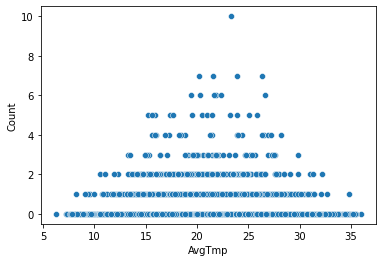

In [21]:
sns.scatterplot(data=tnd_climate, x='AvgTmp', y='Count')

It looks like tornadoes are less likely to happen when there are very hot or very cold winters relatively

<AxesSubplot:xlabel='AvgTmp', ylabel='TndOcc'>

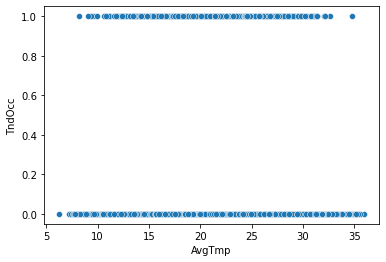

In [22]:
sns.scatterplot(data=tnd_climate, x='AvgTmp', y='TndOcc')

based on the analysis of these plots it would make the most sense to go with a logistic regression approach

# Modeling 3
Using logistic regression to see if a tornado will occur in that county or not

<AxesSubplot:xlabel='AvgTmp'>

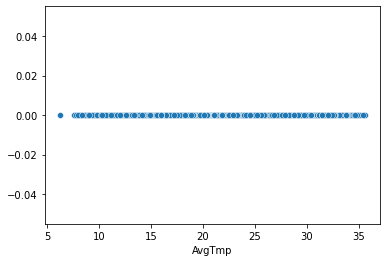

In [23]:
x_train = train[['AvgTmp']]
y_train = train['TndOcc']
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
sns.scatterplot(x=x_train['AvgTmp'], y=y_pred)

In [24]:
accuracy = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=5).mean()
precision = cross_val_score(model, x_train, y_train, scoring='precision', cv=5).mean()
recall = cross_val_score(model, x_train, y_train, scoring='recall', cv=5).mean()
print(f"accuracy = {accuracy:6.3f}")
print(f"precision = {precision:6.3f}")
print(f"recall = {recall:6.3f}")

accuracy =  0.801
precision =  0.000
recall =  0.000


C:\Users\chris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

This model ended up only guessing zero and had about 80% accuracy. The data set is unbalanced in how often zero tornadoes occur in a year, so this needs to be balanced. 

In [25]:
logistic_regression_model(quant_attr, y_train)

Logistic Regression Models
Logistic Model: AvgTmp
accuracy =  0.522
precision =  0.214
recall =  0.525
f_score =  0.304
Logistic Model: AvgMaxTmp
accuracy =  0.527
precision =  0.212
recall =  0.504
f_score =  0.298
Logistic Model: AvgMinTmp
accuracy =  0.517
precision =  0.212
recall =  0.522
f_score =  0.302
Logistic Model: AvgPrecip
accuracy =  0.500
precision =  0.200
recall =  0.505
f_score =  0.286
Logistic Model: TotPrecip
accuracy =  0.500
precision =  0.200
recall =  0.505
f_score =  0.286
Logistic Model: MaxTmp
accuracy =  0.536
precision =  0.203
recall =  0.453
f_score =  0.280
Logistic Model: MinTmp
accuracy =  0.514
precision =  0.206
recall =  0.505
f_score =  0.293
Logistic Model: Combined
accuracy =  0.512
precision =  0.211
recall =  0.527
f_score =  0.301


Balancing the data set resulted in far less accurate models, but they have higher precision and recall. The accuracy is also higher than 0.5 which makes it better than a coin flip. It may not be much, but there is something here.

# Modeling 4
only using hot counties (counties with tornadoes at least once every 4 years on average for logistic prediction)

In [26]:
quant_attr = hot_county_train[['AvgTmp', 'AvgMaxTmp', 'AvgMinTmp', 'AvgPrecip', 'TotPrecip', 'MaxTmp', 'MinTmp']]
y_train = hot_county_train['TndOcc']

In [27]:
logistic_regression_model(quant_attr, y_train)

Logistic Regression Models
Logistic Model: AvgTmp
accuracy =  0.486
precision =  0.249
recall =  0.507
f_score =  0.334
Logistic Model: AvgMaxTmp
accuracy =  0.491
precision =  0.253
recall =  0.514
f_score =  0.339
Logistic Model: AvgMinTmp
accuracy =  0.507
precision =  0.260
recall =  0.512
f_score =  0.345
Logistic Model: AvgPrecip
accuracy =  0.496
precision =  0.257
recall =  0.524
f_score =  0.345
Logistic Model: TotPrecip
accuracy =  0.449
precision =  0.262
recall =  0.639
f_score =  0.372
Logistic Model: MaxTmp
accuracy =  0.516
precision =  0.251
recall =  0.454
f_score =  0.323
Logistic Model: MinTmp
accuracy =  0.499
precision =  0.246
recall =  0.475
f_score =  0.324
Logistic Model: Combined
accuracy =  0.525
precision =  0.272
recall =  0.524
f_score =  0.358


Total precipitation proved to be a good predictor based on recall

# Modeling 5
using only the hottest counties where tornadoes occur at least every 2 years on average

In [28]:
quant_attr = hotter_county_train[['AvgTmp', 'AvgMaxTmp', 'AvgMinTmp', 'AvgPrecip', 'TotPrecip', 'MaxTmp', 'MinTmp']]
y_train = hotter_county_train['TndOcc']

In [29]:
logistic_regression_model(quant_attr, y_train)

Logistic Regression Models
Logistic Model: AvgTmp
accuracy =  0.485
precision =  0.417
recall =  0.480
f_score =  0.446
Logistic Model: AvgMaxTmp
accuracy =  0.489
precision =  0.419
recall =  0.497
f_score =  0.455
Logistic Model: AvgMinTmp
accuracy =  0.493
precision =  0.421
recall =  0.488
f_score =  0.452
Logistic Model: AvgPrecip
accuracy =  0.532
precision =  0.461
recall =  0.537
f_score =  0.496
Logistic Model: TotPrecip
accuracy =  0.532
precision =  0.461
recall =  0.537
f_score =  0.496
Logistic Model: MaxTmp
accuracy =  0.531
precision =  0.457
recall =  0.479
f_score =  0.468
Logistic Model: MinTmp
accuracy =  0.482
precision =  0.419
recall =  0.521
f_score =  0.465
Logistic Model: Combined
accuracy =  0.489
precision =  0.414
recall =  0.454
f_score =  0.433


In [30]:
dummy = DummyClassifier(strategy='most_frequent')

In [31]:
for i in range(quant_attr.shape[1]):
    x_train = pd.DataFrame(quant_attr.iloc[:, i])
    dummy = LogisticRegression()
    dummy.fit(x_train, y_train)
    accuracy = cross_val_score(dummy, x_train, y_train, scoring='accuracy', cv=5).mean()
    precision = cross_val_score(dummy, x_train, y_train, scoring='precision', cv=5).mean()
    recall = cross_val_score(dummy, x_train, y_train, scoring='recall', cv=5).mean()    
    print(f"Logistic Model: {quant_attr.columns[i]}")
    print(f"accuracy = {accuracy:6.3f}")
    print(f"precision = {precision:6.3f}")
    print(f"recall = {recall:6.3f}")

Logistic Model: AvgTmp
accuracy =  0.570
precision =  0.086
recall =  0.025


C:\Users\chris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

Logistic Model: AvgMaxTmp
accuracy =  0.560
precision =  0.060
recall =  0.025
Logistic Model: AvgMinTmp
accuracy =  0.574
precision =  0.100
recall =  0.017
Logistic Model: AvgPrecip
accuracy =  0.567
precision =  0.050
recall =  0.008


C:\Users\chris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

Logistic Model: TotPrecip
accuracy =  0.563
precision =  0.040
recall =  0.008
Logistic Model: MaxTmp
accuracy =  0.563
precision =  0.467
recall =  0.050


C:\Users\chris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

Logistic Model: MinTmp
accuracy =  0.574
precision =  0.000
recall =  0.000


C:\Users\chris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
quant_attr = hotter_county_train[['MaxTmp']]
y_train = hotter_county_train['TndOcc']
logistic_regression_model_combined(quant_attr, y_train)

Logistic Model: Combined
accuracy =  0.531
precision =  0.457
recall =  0.479
f_score =  0.468


In [33]:
quant_attr = hotter_county_train[['MaxTmp', 'AvgPrecip']]
y_train = hotter_county_train['TndOcc']
logistic_regression_model_combined(quant_attr, y_train)

Logistic Model: Combined
accuracy =  0.496
precision =  0.427
recall =  0.520
f_score =  0.469


# Modeling 6
Using logistic regression with the original data, but onehot encoding counties and using a standard scaler

In [34]:
y_train = train['TndOcc']
X_train = train[['County', 'AvgTmp', 'AvgMaxTmp', 'AvgMinTmp', 'AvgPrecip', 'TotPrecip', 'MaxTmp', 'MinTmp']]
categorical = ['County']
quantitative = ['AvgTmp', 'AvgMaxTmp', 'AvgMinTmp', 'AvgPrecip', 'TotPrecip', 'MaxTmp', 'MinTmp']

In [35]:
logistic_regression_onehot(X_train, y_train, categorical, quantitative)

Logistic Regression Models One Hot Encoding ['County']
One Hot Logistic Model: AvgTmp
accuracy =  0.551
precision =  0.248
recall =  0.618
f_score =  0.354
One Hot Logistic Model: AvgMaxTmp
accuracy =  0.556
precision =  0.251
recall =  0.619
f_score =  0.357
One Hot Logistic Model: AvgMinTmp
accuracy =  0.548
precision =  0.246
recall =  0.612
f_score =  0.351
One Hot Logistic Model: AvgPrecip
accuracy =  0.547
precision =  0.247
recall =  0.621
f_score =  0.354
One Hot Logistic Model: TotPrecip
accuracy =  0.547
precision =  0.247
recall =  0.621
f_score =  0.354
One Hot Logistic Model: MaxTmp
accuracy =  0.547
precision =  0.245
recall =  0.613
f_score =  0.351
One Hot Logistic Model: MinTmp
accuracy =  0.551
precision =  0.248
recall =  0.617
f_score =  0.354
One Hot Logistic Model: Combined
accuracy =  0.564
precision =  0.252
recall =  0.603
f_score =  0.356


Total precipitation and average precipitation proved to be good indicators when used with the one hot encoded counties based on recall, but average max temperature looks to be the best predictor all around. Precision scores have also dropped drastically using this onehot encoded data

# Modeling 7
Using rolling averages in conjunction with one hot encoded county data

In [36]:
rolling_avg = tnd_climate[['County', 'Year', 'AvgTmp', 'AvgMaxTmp', 'AvgMinTmp', 'AvgPrecip', 'TotPrecip', 'MaxTmp', 'MinTmp', 'Count', 'TndOcc']]

Calculate the average temperature over the last five years (including current), average precipitation over the last five years (including current), and average tornado count (not including current) for each county each year

In [37]:
for county in list(rolling_avg['County'].unique()):
    for i in range(1954, 2021):
        AvgAvgMaxTmp_5 = 0
        AvgAvgMinTmp_5 = 0
        AvgAvgPrecip_5 = 0
        AvgPrecip_5 = 0
        AvgMaxTmp_5 = 0
        AvgMinTmp_5 = 0
        AvgTmp_5 = 0
        
        for j in range(i - 4, i + 1):
            AvgAvgMaxTmp_5 += float(rolling_avg[(rolling_avg['County'] == county) & (rolling_avg['Year'] == j)]['AvgMaxTmp'])
            AvgAvgMinTmp_5 += float(rolling_avg[(rolling_avg['County'] == county) & (rolling_avg['Year'] == j)]['AvgMinTmp'])
            AvgAvgPrecip_5 += float(rolling_avg[(rolling_avg['County'] == county) & (rolling_avg['Year'] == j)]['AvgPrecip'])
            AvgPrecip_5 += float(rolling_avg[(rolling_avg['County'] == county) & (rolling_avg['Year'] == j)]['TotPrecip'])
            AvgMaxTmp_5 += float(rolling_avg[(rolling_avg['County'] == county) & (rolling_avg['Year'] == j)]['MaxTmp'])
            AvgMinTmp_5 += float(rolling_avg[(rolling_avg['County'] == county) & (rolling_avg['Year'] == j)]['MinTmp'])
            AvgTmp_5 += float(rolling_avg[(rolling_avg['County'] == county) & (rolling_avg['Year'] == j)]['AvgTmp'])
            

        rolling_avg.loc[(rolling_avg['County'] == county) & (rolling_avg['Year'] == i), 'AvgAvgMaxTmp_5'] = AvgAvgMaxTmp_5 / 5
        rolling_avg.loc[(rolling_avg['County'] == county) & (rolling_avg['Year'] == i), 'AvgAvgMinTmp_5'] = AvgAvgMinTmp_5 / 5
        rolling_avg.loc[(rolling_avg['County'] == county) & (rolling_avg['Year'] == i), 'AvgAvgPrecip_5'] = AvgAvgPrecip_5 / 5
        rolling_avg.loc[(rolling_avg['County'] == county) & (rolling_avg['Year'] == i), 'AvgPrecip_5'] = AvgPrecip_5 / 5
        rolling_avg.loc[(rolling_avg['County'] == county) & (rolling_avg['Year'] == i), 'AvgMaxTmp_5'] = AvgMaxTmp_5 / 5
        rolling_avg.loc[(rolling_avg['County'] == county) & (rolling_avg['Year'] == i), 'AvgMinTmp_5'] = AvgMinTmp_5 / 5
        rolling_avg.loc[(rolling_avg['County'] == county) & (rolling_avg['Year'] == i), 'AvgTmp_5'] = AvgTmp_5 / 5

C:\Users\chris\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\chris\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [38]:
for county in list(rolling_avg['County'].unique()):
    for i in range(1955, 2021):
        AvgCount_5 = 0
        
        for j in range(i - 5, i):
            AvgCount_5 += float(rolling_avg[(rolling_avg['County'] == county) & (rolling_avg['Year'] == j)]['Count'])
            
        AvgCount_5 = AvgCount_5 / 5
        rolling_avg.loc[(rolling_avg['County'] == county) & (rolling_avg['Year'] == i), 'AvgCount_5'] = AvgCount_5

The first 6 years of data for each county will need to be cut out since it will have NaN values for AvgCount_5

In [39]:
roll_train, roll_test = train_test_split(rolling_avg, test_size = 0.2, random_state=10)

In [40]:
valid_data = roll_train[roll_train['AvgCount_5'].notnull()]
X_train = valid_data[['County', 'AvgAvgMaxTmp_5', 'AvgAvgMinTmp_5', 'AvgAvgPrecip_5', 'AvgPrecip_5', 'AvgMaxTmp_5', 'AvgMinTmp_5', 'AvgTmp_5', 'AvgCount_5']]
y_train = valid_data['TndOcc']
categorical = ['County']
quantitative = ['AvgAvgMaxTmp_5', 'AvgAvgMinTmp_5', 'AvgAvgPrecip_5', 'AvgPrecip_5', 'AvgMaxTmp_5', 'AvgMinTmp_5', 'AvgTmp_5', 'AvgCount_5']
logistic_regression_onehot(X_train, y_train, categorical, quantitative)

Logistic Regression Models One Hot Encoding ['County']
One Hot Logistic Model: AvgAvgMaxTmp_5
accuracy =  0.547
precision =  0.256
recall =  0.618
f_score =  0.362
One Hot Logistic Model: AvgAvgMinTmp_5
accuracy =  0.544
precision =  0.255
recall =  0.616
f_score =  0.361
One Hot Logistic Model: AvgAvgPrecip_5
accuracy =  0.543
precision =  0.254
recall =  0.619
f_score =  0.361
One Hot Logistic Model: AvgPrecip_5
accuracy =  0.543
precision =  0.254
recall =  0.619
f_score =  0.361
One Hot Logistic Model: AvgMaxTmp_5
accuracy =  0.547
precision =  0.255
recall =  0.610
f_score =  0.360
One Hot Logistic Model: AvgMinTmp_5
accuracy =  0.550
precision =  0.256
recall =  0.610
f_score =  0.361
One Hot Logistic Model: AvgTmp_5
accuracy =  0.545
precision =  0.255
recall =  0.616
f_score =  0.361
One Hot Logistic Model: AvgCount_5
accuracy =  0.544
precision =  0.254
recall =  0.612
f_score =  0.359
One Hot Logistic Model: Combined
accuracy =  0.554
precision =  0.254
recall =  0.586
f_scor

The average of the average minimum winter temperature and average winter temperature over 5 years and performed best in terms of f_score, but average maximum winter temperature over 5 years performed best in terms of recall.

# Modeling 8
Using how recently tornadoes occurred in a location for prediction

In [41]:
past_tnd = rolling_avg[['Year', 'County', 'AvgAvgMaxTmp_5', 'AvgAvgMinTmp_5', 'AvgAvgPrecip_5', 'AvgPrecip_5', 'AvgMaxTmp_5', 'AvgMinTmp_5', 'AvgTmp_5', 'AvgCount_5', 'TndOcc']]
past_tnd['Lst1YrTnd'] = 0
past_tnd['Lst2YrTnd'] = 0
past_tnd['Lst3YrTnd'] = 0

C:\Users\chris\AppData\Local\Temp/ipykernel_19020/3537178241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  past_tnd['Lst1YrTnd'] = 0
C:\Users\chris\AppData\Local\Temp/ipykernel_19020/3537178241.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  past_tnd['Lst2YrTnd'] = 0
C:\Users\chris\AppData\Local\Temp/ipykernel_19020/3537178241.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [42]:
for county in list(past_tnd['County'].unique()):
    for i in range(1951, 2021):
        if(int(past_tnd[(past_tnd['County'] == county) & (past_tnd['Year'] == i-1)]['TndOcc']) == 1):
            past_tnd.loc[(past_tnd['County'] == county) & (past_tnd['Year'] == i), 'Lst1YrTnd'] = 1
            
    for i in range(1952, 2021):
        if(int(past_tnd[(past_tnd['County'] == county) & (past_tnd['Year'] == i-1)]['TndOcc']) == 1 or int(past_tnd[(past_tnd['County'] == county) & (past_tnd['Year'] == i-2)]['TndOcc']) == 1):
            past_tnd.loc[(past_tnd['County'] == county) & (past_tnd['Year'] == i), 'Lst2YrTnd'] = 1
            
    for i in range(1953, 2021):
        if(int(past_tnd[(past_tnd['County'] == county) & (past_tnd['Year'] == i-1)]['TndOcc']) == 1 or int(past_tnd[(past_tnd['County'] == county) & (past_tnd['Year'] == i-2)]['TndOcc']) == 1) or int((past_tnd[(past_tnd['County'] == county) & (past_tnd['Year'] == i-3)]['TndOcc']) == 1):
            past_tnd.loc[(past_tnd['County'] == county) & (past_tnd['Year'] == i), 'Lst3YrTnd'] = 1

C:\Users\chris\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [43]:
past_tnd.loc[:, 'Lst1YrTnd'] = past_tnd['Lst1YrTnd'].astype('category')
past_tnd.loc[:, 'Lst2YrTnd'] = past_tnd['Lst2YrTnd'].astype('category')
past_tnd.loc[:, 'Lst3YrTnd'] = past_tnd['Lst3YrTnd'].astype('category')

C:\Users\chris\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [44]:
past_train, past_test = train_test_split(past_tnd, test_size = 0.2, random_state=10)

In [45]:
valid_data = past_train[past_train['AvgCount_5'].notnull()]
X_train = valid_data[['County', 'Lst1YrTnd', 'AvgAvgMaxTmp_5', 'AvgAvgMinTmp_5', 'AvgAvgPrecip_5', 'AvgPrecip_5', 'AvgMaxTmp_5', 'AvgMinTmp_5', 'AvgTmp_5', 'AvgCount_5']]
y_train = valid_data['TndOcc']
categorical = ['County', 'Lst1YrTnd']
quantitative = ['AvgAvgMaxTmp_5', 'AvgAvgMinTmp_5', 'AvgAvgPrecip_5', 'AvgPrecip_5', 'AvgMaxTmp_5', 'AvgMinTmp_5', 'AvgTmp_5', 'AvgCount_5']
logistic_regression_onehot(X_train, y_train, categorical, quantitative)

Logistic Regression Models One Hot Encoding ['County', 'Lst1YrTnd']
One Hot Logistic Model: AvgAvgMaxTmp_5
accuracy =  0.552
precision =  0.258
recall =  0.611
f_score =  0.363
One Hot Logistic Model: AvgAvgMinTmp_5
accuracy =  0.551
precision =  0.256
recall =  0.609
f_score =  0.361
One Hot Logistic Model: AvgAvgPrecip_5
accuracy =  0.548
precision =  0.255
recall =  0.606
f_score =  0.359
One Hot Logistic Model: AvgPrecip_5
accuracy =  0.548
precision =  0.255
recall =  0.606
f_score =  0.359
One Hot Logistic Model: AvgMaxTmp_5
accuracy =  0.550
precision =  0.256
recall =  0.609
f_score =  0.360
One Hot Logistic Model: AvgMinTmp_5
accuracy =  0.555
precision =  0.259
recall =  0.610
f_score =  0.364
One Hot Logistic Model: AvgTmp_5
accuracy =  0.552
precision =  0.257
recall =  0.610
f_score =  0.362
One Hot Logistic Model: AvgCount_5
accuracy =  0.548
precision =  0.255
recall =  0.607
f_score =  0.359
One Hot Logistic Model: Combined
accuracy =  0.556
precision =  0.257
recall = 

In [46]:
X_train = valid_data[['County', 'Lst2YrTnd', 'AvgAvgMaxTmp_5', 'AvgAvgMinTmp_5', 'AvgAvgPrecip_5', 'AvgPrecip_5', 'AvgMaxTmp_5', 'AvgMinTmp_5', 'AvgTmp_5', 'AvgCount_5']]
y_train = valid_data['TndOcc']
categorical = ['County', 'Lst2YrTnd']
quantitative = ['AvgAvgMaxTmp_5', 'AvgAvgMinTmp_5', 'AvgAvgPrecip_5', 'AvgPrecip_5', 'AvgMaxTmp_5', 'AvgMinTmp_5', 'AvgTmp_5', 'AvgCount_5']
logistic_regression_onehot(X_train, y_train, categorical, quantitative)

Logistic Regression Models One Hot Encoding ['County', 'Lst2YrTnd']
One Hot Logistic Model: AvgAvgMaxTmp_5
accuracy =  0.544
precision =  0.253
recall =  0.610
f_score =  0.358
One Hot Logistic Model: AvgAvgMinTmp_5
accuracy =  0.544
precision =  0.254
recall =  0.612
f_score =  0.359
One Hot Logistic Model: AvgAvgPrecip_5
accuracy =  0.544
precision =  0.253
recall =  0.607
f_score =  0.357
One Hot Logistic Model: AvgPrecip_5
accuracy =  0.544
precision =  0.253
recall =  0.607
f_score =  0.357
One Hot Logistic Model: AvgMaxTmp_5
accuracy =  0.545
precision =  0.253
recall =  0.605
f_score =  0.357
One Hot Logistic Model: AvgMinTmp_5
accuracy =  0.551
precision =  0.257
recall =  0.610
f_score =  0.362
One Hot Logistic Model: AvgTmp_5
accuracy =  0.544
precision =  0.253
recall =  0.611
f_score =  0.358
One Hot Logistic Model: AvgCount_5
accuracy =  0.544
precision =  0.253
recall =  0.609
f_score =  0.358
One Hot Logistic Model: Combined
accuracy =  0.553
precision =  0.254
recall = 

In [47]:
X_train = valid_data[['County', 'Lst3YrTnd', 'AvgAvgMaxTmp_5', 'AvgAvgMinTmp_5', 'AvgAvgPrecip_5', 'AvgPrecip_5', 'AvgMaxTmp_5', 'AvgMinTmp_5', 'AvgTmp_5', 'AvgCount_5']]
y_train = valid_data['TndOcc']
categorical = ['County', 'Lst3YrTnd']
quantitative = ['AvgAvgMaxTmp_5', 'AvgAvgMinTmp_5', 'AvgAvgPrecip_5', 'AvgPrecip_5', 'AvgMaxTmp_5', 'AvgMinTmp_5', 'AvgTmp_5', 'AvgCount_5']
logistic_regression_onehot(X_train, y_train, categorical, quantitative)

Logistic Regression Models One Hot Encoding ['County', 'Lst3YrTnd']
One Hot Logistic Model: AvgAvgMaxTmp_5
accuracy =  0.544
precision =  0.255
recall =  0.615
f_score =  0.360
One Hot Logistic Model: AvgAvgMinTmp_5
accuracy =  0.544
precision =  0.254
recall =  0.615
f_score =  0.360
One Hot Logistic Model: AvgAvgPrecip_5
accuracy =  0.542
precision =  0.254
recall =  0.619
f_score =  0.360
One Hot Logistic Model: AvgPrecip_5
accuracy =  0.542
precision =  0.254
recall =  0.619
f_score =  0.360
One Hot Logistic Model: AvgMaxTmp_5
accuracy =  0.544
precision =  0.252
recall =  0.604
f_score =  0.355
One Hot Logistic Model: AvgMinTmp_5
accuracy =  0.549
precision =  0.256
recall =  0.610
f_score =  0.361
One Hot Logistic Model: AvgTmp_5
accuracy =  0.544
precision =  0.254
recall =  0.612
f_score =  0.359
One Hot Logistic Model: AvgCount_5
accuracy =  0.543
precision =  0.254
recall =  0.613
f_score =  0.359
One Hot Logistic Model: Combined
accuracy =  0.554
precision =  0.253
recall = 

There was not much improvement expanding tornado occurrence past 1 year

In [48]:
valid_data = past_train[past_train['Year'] > 1950]
X_train = valid_data[['County', 'Lst1YrTnd']]
y_train = valid_data['TndOcc']
categorical = ['County', 'Lst1YrTnd']
quantitative = []
logistic_regression_onehot(X_train, y_train, categorical, quantitative)

Logistic Regression Models One Hot Encoding ['County', 'Lst1YrTnd']
One Hot Logistic Model: Combined
accuracy =  0.553
precision =  0.251
recall =  0.613
f_score =  0.356


In [49]:
valid_data = past_train[past_train['Year'] > 1951]
X_train = valid_data[['County', 'Lst2YrTnd']]
y_train = valid_data['TndOcc']
categorical = ['County', 'Lst2YrTnd']
quantitative = []
logistic_regression_onehot(X_train, y_train, categorical, quantitative)

Logistic Regression Models One Hot Encoding ['County', 'Lst2YrTnd']
One Hot Logistic Model: Combined
accuracy =  0.551
precision =  0.250
recall =  0.607
f_score =  0.354


In [50]:
valid_data = past_train[past_train['Year'] > 1952]
X_train = valid_data[['County', 'Lst3YrTnd']]
y_train = valid_data['TndOcc']
categorical = ['County', 'Lst3YrTnd']
quantitative = []
logistic_regression_onehot(X_train, y_train, categorical, quantitative)

Logistic Regression Models One Hot Encoding ['County', 'Lst3YrTnd']
One Hot Logistic Model: Combined
accuracy =  0.555
precision =  0.257
recall =  0.616
f_score =  0.363


In [51]:
valid_data = past_train[past_train['Year'] > 1950]
X_train = valid_data[['Lst1YrTnd']]
y_train = valid_data['TndOcc']
categorical = ['Lst1YrTnd']
quantitative = []
logistic_regression_onehot(X_train, y_train, categorical, quantitative)

Logistic Regression Models One Hot Encoding ['Lst1YrTnd']
One Hot Logistic Model: Combined
accuracy =  0.704
precision =  0.263
recall =  0.260
f_score =  0.261


In [52]:
valid_data = past_train[past_train['Year'] > 1951]
X_train = valid_data[['Lst2YrTnd']]
y_train = valid_data['TndOcc']
categorical = ['Lst2YrTnd']
quantitative = []
logistic_regression_onehot(X_train, y_train, categorical, quantitative)

Logistic Regression Models One Hot Encoding ['Lst2YrTnd']
One Hot Logistic Model: Combined
accuracy =  0.621
precision =  0.245
recall =  0.417
f_score =  0.309


In [53]:
valid_data = past_train[past_train['Year'] > 1952]
X_train = valid_data[['Lst3YrTnd']]
y_train = valid_data['TndOcc']
categorical = ['Lst3YrTnd']
quantitative = []
logistic_regression_onehot(X_train, y_train, categorical, quantitative)

Logistic Regression Models One Hot Encoding ['Lst3YrTnd']
One Hot Logistic Model: Combined
accuracy =  0.556
precision =  0.243
recall =  0.550
f_score =  0.337


In [54]:
valid_data = past_train[['County', 'TndOcc']]
X_train = valid_data[['County']]
y_train = valid_data['TndOcc']
categorical = ['County']
quantitative = []
logistic_regression_onehot(X_train, y_train, categorical, quantitative)

Logistic Regression Models One Hot Encoding ['County']
One Hot Logistic Model: Combined
accuracy =  0.548
precision =  0.246
recall =  0.614
f_score =  0.351


In [55]:
valid_data = past_train[past_train['Year'] > 1953]
X_train = valid_data[['County', 'Lst1YrTnd', 'AvgAvgMaxTmp_5']]
y_train = valid_data['TndOcc']
categorical = ['County', 'Lst1YrTnd']
quantitative = ['AvgAvgMaxTmp_5']
logistic_regression_onehot_combined(X_train, y_train, categorical, quantitative)

One Hot Logistic Model: Combined
accuracy =  0.558
precision =  0.260
recall =  0.609
f_score =  0.365


This appeared to be one of the better models when testing all the attributes one after another. I want to explore how other attributes work with this individually.

In [56]:
X_train = valid_data[['County', 'Lst1YrTnd', 'AvgAvgMaxTmp_5', 'AvgMaxTmp_5']]
y_train = valid_data['TndOcc']
categorical = ['County', 'Lst1YrTnd']
quantitative = ['AvgAvgMaxTmp_5', 'AvgMaxTmp_5']
logistic_regression_onehot_combined(X_train, y_train, categorical, quantitative)

One Hot Logistic Model: Combined
accuracy =  0.563
precision =  0.261
recall =  0.599
f_score =  0.363


In [57]:
X_train = valid_data[['County', 'Lst1YrTnd', 'AvgAvgMaxTmp_5', 'AvgPrecip_5']]
y_train = valid_data['TndOcc']
categorical = ['County', 'Lst1YrTnd']
quantitative = ['AvgAvgMaxTmp_5', 'AvgPrecip_5']
logistic_regression_onehot_combined(X_train, y_train, categorical, quantitative)

One Hot Logistic Model: Combined
accuracy =  0.557
precision =  0.260
recall =  0.610
f_score =  0.365


Just using the average of the average maximum temperature over 5 years resulted in the higher f_score

# Modeling 9
Using the average of the average maximum winter temperature over 5 years, county name, and whether or not a tornado occurred the previous year in the final model.

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [59]:
test_set = past_test[past_test['Year'] > 1953]
train_set = past_train[past_train['Year'] > 1953]

In [60]:
column_trans = ColumnTransformer(transformers=[
    ('scaler', StandardScaler(), ['AvgAvgMaxTmp_5']),
    ('onehot', OneHotEncoder(), ['County', 'Lst1YrTnd'])
])

model = Pipeline(steps=[
    ('preprocessor', column_trans),
    ('lm', LogisticRegression(class_weight='balanced', max_iter=200))
])

In [61]:
X_train = train_set[['AvgAvgMaxTmp_5', 'County', 'Lst1YrTnd']]
y_train = train_set['TndOcc']
X_test = test_set[['AvgAvgMaxTmp_5', 'County', 'Lst1YrTnd']]
y_test = test_set['TndOcc']
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f_score = 2 * (precision * recall) / (precision + recall)

print("Final Model Metrics")
print(f"accuracy = {accuracy:6.3f}")
print(f"precision = {precision:6.3f}")
print(f"recall = {recall:6.3f}") 
print(f"f_score = {f_score:6.3f}")


Final Model Metrics
accuracy =  0.544
precision =  0.246
recall =  0.593
f_score =  0.348


# Modeling 10
Using final model to make 2022 predictions

In [62]:
data = pd.read_csv('data/max_monthly_tmp_1895-2022_county.csv')

In [63]:
data = data[['Location', 'Date', 'Value']]

In [64]:
data['Year'] = data['Date'].astype(str).str[0:4].astype('int64')
data['Month'] = data['Date'].astype(str).str[4:].astype('int64')
data = data[(data['Year'] > 2017) & (data['Month'] < 4)]
data = data[['Location', 'Value', 'Year']]
data.columns = ['County', 'MaxTmp', 'Year']

In [65]:
data = data.groupby(['County', 'Year'])[['MaxTmp']].mean()
data.columns = ['AvgMaxTmp']

In [66]:
data.to_csv('data/clean/final_prediction_data')
data = pd.read_csv('data/clean/final_prediction_data')
data.head()

,County,Year,AvgMaxTmp
0,Adams County,2018,33.133333
1,Adams County,2019,29.400000
2,Adams County,2020,35.800000
3,Adams County,2021,33.766667
4,Adams County,2022,30.466667


In [67]:
for county in list(data['County'].unique()):
    AvgAvgMaxTmp_5 = 0

    for j in range(2018, 2023):
        AvgAvgMaxTmp_5 += float(data[(data['County'] == county) & (data['Year'] == j)]['AvgMaxTmp'])

    data.loc[(data['County'] == county) & (data['Year'] == 2022), 'AvgAvgMaxTmp_5'] = AvgAvgMaxTmp_5 / 5

In [68]:
data = data[data['Year'] == 2022]

In [69]:
data.head()

,County,Year,AvgMaxTmp,AvgAvgMaxTmp_5
4,Adams County,2022,30.466667,32.513333
9,Ashland County,2022,23.166667,26.766667
14,Barron County,2022,25.233333,28.213333
19,Bayfield County,2022,23.600000,27.006667
24,Brown County,2022,29.966667,31.760000


Manually inputting from NOAA whether or not a tornado occurred last year in the county

In [70]:
data['Lst1YrTnd'] = 0
data.loc[data['County'] == 'Rusk County', 'Lst1YrTnd'] = 1
data.loc[data['County'] == 'Chippewa County', 'Lst1YrTnd'] = 1
data.loc[data['County'] == 'Lincoln County', 'Lst1YrTnd'] = 1
data.loc[data['County'] == 'Marathon County', 'Lst1YrTnd'] = 1
data.loc[data['County'] == 'St. Croix County', 'Lst1YrTnd'] = 1
data.loc[data['County'] == 'Waushara County', 'Lst1YrTnd'] = 1
data.loc[data['County'] == 'Columbia County', 'Lst1YrTnd'] = 1
data.loc[data['County'] == 'Dane County', 'Lst1YrTnd'] = 1
data.loc[data['County'] == 'Jefferson County', 'Lst1YrTnd'] = 1
data.loc[data['County'] == 'Waukesha County', 'Lst1YrTnd'] = 1
data.loc[data['County'] == 'Grant County', 'Lst1YrTnd'] = 1
data.loc[data['County'] == 'Iowa County', 'Lst1YrTnd'] = 1
data.loc[data['County'] == 'Rock County', 'Lst1YrTnd'] = 1
data.loc[data['County'] == 'Outagamie County', 'Lst1YrTnd'] = 1
data.loc[data['County'] == 'Monroe County', 'Lst1YrTnd'] = 1
data.loc[data['County'] == 'Shawano County', 'Lst1YrTnd'] = 1
data.loc[data['County'] == 'Brown County', 'Lst1YrTnd'] = 1
data.loc[data['County'] == 'Trempealeau County', 'Lst1YrTnd'] = 1
data.loc[data['County'] == 'Jackson County', 'Lst1YrTnd'] = 1
data.loc[data['County'] == 'Eau Claire County', 'Lst1YrTnd'] = 1
data.loc[data['County'] == 'Clark County', 'Lst1YrTnd'] = 1

In [71]:
data = data[['County', 'AvgAvgMaxTmp_5', 'Lst1YrTnd']]
data.loc[data['County'] == 'St. Croix County', 'County'] = 'Saint Croix County'
data = data[data['County'] != 'Menominee County']

In [72]:
model.fit(X_train, y_train)
y_pred = model.predict(data[['AvgAvgMaxTmp_5', 'County', 'Lst1YrTnd']])
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0], dtype=int64)

In [73]:
data['2022Pred'] = y_pred

In [74]:
data.to_csv('data/clean/interactive_map_data')

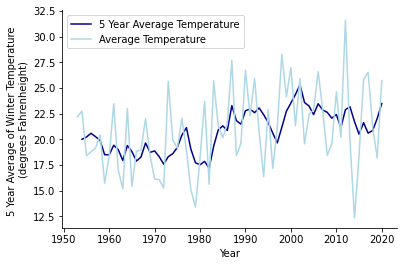

In [79]:
plot = sns.lineplot(data=past_tnd[past_tnd['Year'] > 1952], x='Year', y='AvgTmp_5', ci=None, color='darkblue')
sns.lineplot(data=tnd_climate[tnd_climate['Year'] > 1952], x='Year', y='AvgTmp', ci=None, color='lightblue', legend=True, ax=plot)
plot.set(xlabel='Year', ylabel="5 Year Average of Winter Temperature \n(degrees Fahrenheight)")
plot.spines['right'].set_visible(False)
plot.spines['top'].set_visible(False)
plot.legend(['5 Year Average Temperature', 'Average Temperature'])